In [21]:
import json
import numpy as np 
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt

In [90]:
with open('final_data_url.json') as json_file:
    data = json.load(json_file)

In [3]:
data[0].keys()

dict_keys(['title', 'url', 'date', 'transcript', 'source'])

In [91]:
df = pd.read_json('final_data_url.json', convert_dates=False)

In [92]:
print('Total Num Articles: ', len(df['score']))
print('Total Missing Score: ', df['score'].isna().sum())

Total Num Articles:  4367
Total Missing Score:  953


In [93]:
print('Total Num Articles: ', len(df['score']))
print('Total Missing Comments: ', df['comments'].isna().sum())

Total Num Articles:  4367
Total Missing Comments:  953


In [94]:
df.tail()

,title,url,date,transcript,source,subtitle,score,comments,thumbnail
4362,"What if all of the captive orcas, dolphins, an...",https://whalesanctuaryproject.org,2019-12-1,,reddit.com/r/UpliftingNews,NaN,1.0,29.0,https://b.thumbs.redditmedia.com/FjthxilDx_L6d...
4363,Pretty cool right guys?,https://v.redd.it/1b1oylmm75241,2019-12-1,"Sorry, this post has been removed by the moder...",reddit.com/r/UpliftingNews,NaN,1.0,0.0,default
4364,Cuba found to be the most sustainably develope...,https://morningstaronline.co.uk/article/w/cuba...,2019-12-1,CUBA is the most sustainably developed country...,reddit.com/r/UpliftingNews,NaN,1.0,5.0,https://b.thumbs.redditmedia.com/hDwEWmU399dVs...
4365,"Compassionate Restaurant Sets Up ""Take One Lea...",https://understandingcompassion.com/compassion...,2019-12-1,"Winter is not an easy time for the homeless, a...",reddit.com/r/UpliftingNews,NaN,1.0,0.0,default
4366,A tiny Colorado town opened its arms to over 7...,https://www.denverpost.com/2019/12/01/colorado...,2019-12-1,When the emergency shelter in Fairplay ran out...,reddit.com/r/UpliftingNews,NaN,1.0,14.0,default


/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


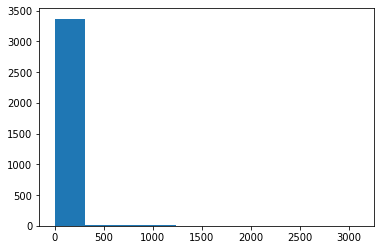

In [95]:
plt.hist(df['comments'])
plt.show()

In [96]:
df.describe()

,score,comments
count,3414.000000,3414.000000
mean,286.221734,17.134739
std,2810.811991,133.461548
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,0.000000
75%,9.000000,1.000000
max,57956.000000,3102.000000


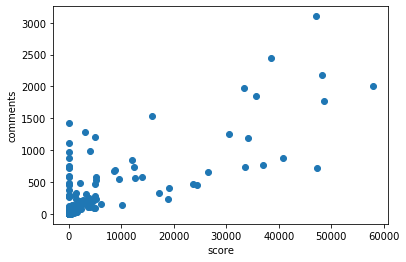

In [97]:
plt.scatter(df['score'], df['comments'])
plt.xlabel('score')
plt.ylabel('comments')
plt.show()

In [98]:
df['score'] = df['score'].replace(np.NaN, 1.0)
df['comments'] = df['comments'].replace(np.NaN, 0.0)

In [99]:
df.describe()

,score,comments
count,4367.000000,4367.000000
mean,223.978475,13.395466
std,2487.972699,118.212217
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,0.000000
75%,2.000000,1.000000
max,57956.000000,3102.000000


In [101]:
df.isna().sum()

title            0
url              0
date             0
transcript       0
source           0
subtitle      4167
score            0
comments         0
thumbnail      953
dtype: int64

In [102]:
df.to_json('final_data_no_missing.json', orient='records')

In [103]:
with open('final_data_no_missing.json', 'w', encoding='utf-8') as file:
    df.to_json(file, force_ascii=False, orient='records')

In [110]:
df

,title,url,date,transcript,source,subtitle,score,comments,thumbnail
0,16-Year-Old Has Been Using His Flying Lessons ...,https://www.goodnewsnetwork.org/teen-flies-sup...,2020-4-9,16-year-old TJ Kim may not have his driver’s l...,goodnewsnetwork.org,NaN,1.0,0.0,NaN
1,Tyler Perry Picks Up the Tab for All Groceries...,https://www.goodnewsnetwork.org/tyler-perry-pa...,2020-4-9,It’s not uncommon for movie mogul Tyler Perry ...,goodnewsnetwork.org,NaN,1.0,0.0,NaN
2,Taking Hot Baths Every Day is Linked to Lower ...,https://www.goodnewsnetwork.org/daily-hot-bath...,2020-4-8,Regular tub bathing is linked to a lower risk ...,goodnewsnetwork.org,NaN,1.0,0.0,NaN
3,Watch Farmer Use His Tractor to Plow Massive T...,https://www.goodnewsnetwork.org/farmer-plows-t...,2020-4-8,A talented farmer has created his own heartwar...,goodnewsnetwork.org,NaN,1.0,0.0,NaN
4,3 Ways to Deal With the Anxiety of a New Situa...,https://www.goodnewsnetwork.org/dr-brene-brown...,2020-4-8,The Lesson: If you have been stressing out ami...,goodnewsnetwork.org,NaN,1.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...
4362,"What if all of the captive orcas, dolphins, an...",https://whalesanctuaryproject.org,2019-12-1,,reddit.com/r/UpliftingNews,NaN,1.0,29.0,https://b.thumbs.redditmedia.com/FjthxilDx_L6d...
4363,Pretty cool right guys?,https://v.redd.it/1b1oylmm75241,2019-12-1,"Sorry, this post has been removed by the moder...",reddit.com/r/UpliftingNews,NaN,1.0,0.0,default
4364,Cuba found to be the most sustainably develope...,https://morningstaronline.co.uk/article/w/cuba...,2019-12-1,CUBA is the most sustainably developed country...,reddit.com/r/UpliftingNews,NaN,1.0,5.0,https://b.thumbs.redditmedia.com/hDwEWmU399dVs...
4365,"Compassionate Restaurant Sets Up ""Take One Lea...",https://understandingcompassion.com/compassion...,2019-12-1,"Winter is not an easy time for the homeless, a...",reddit.com/r/UpliftingNews,NaN,1.0,0.0,default
